### Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import itertools
from glob import glob
from PIL import Image

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


### Data Set 

In [2]:
base_crack_Negative = "Negative"
base_crack_Positive = "Positive"

In [3]:
crack_Negative_df = pd.DataFrame(columns=( 'path', 'image', 'label'),index=np.arange(0,20000))
crack_Positive_df = pd.DataFrame(columns=( 'path', 'image', 'label'),index=np.arange(0,20000))

In [4]:
imageid_path_dict_Negative = np.array([x for x in glob(os.path.join(base_crack_Negative, '*.jpg'))])
imageid_path_dict_Positive = np.array([x for x in glob(os.path.join(base_crack_Positive, '*.jpg'))])

In [5]:
crack_Negative_df['path']=imageid_path_dict_Negative
crack_Negative_df['label']=0
crack_Negative_df['image']=crack_Negative_df['path'].map(lambda x: np.asarray(Image.open(x).resize((75,100))))

crack_Positive_df['path']=imageid_path_dict_Positive
crack_Positive_df['label']=1
crack_Positive_df['image']=crack_Positive_df['path'].map(lambda x: np.asarray(Image.open(x).resize((75,100))))

print("Negative:",crack_Negative_df["image"][0].shape)
print("Positive:",crack_Positive_df["image"][0].shape)

print(imageid_path_dict_Negative.shape,imageid_path_dict_Positive.shape)

Negative: (100, 75, 3)
Positive: (100, 75, 3)
(20000,) (20000,)


In [6]:
crack_df = crack_Negative_df.append(crack_Positive_df)
crack_df.reset_index(drop=True,inplace=True)
print(crack_df.shape)

(40000, 3)


### Feature Selection

In [7]:
features=crack_df.drop(columns=['label'],axis=1)
target=crack_df["label"]

#### SPLITTING DATA SET 
#### Training & Testing :

In [8]:
x_train_o, x_test_o, y_train, y_test = train_test_split(features, target, test_size=0.20,random_state=1234)

In [9]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [10]:
x_train = x_train.reshape(x_train.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))

### Modelling the Data

In [11]:
input_shape = (75, 100, 3)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 100, 32)       896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 100, 32)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 50, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 25, 64)       

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, validation_split=0.1,epochs=50, batch_size=256)

Train on 28800 samples, validate on 3200 samples
Epoch 1/50
28800/28800 [==============================] - 18s 641us/step - loss: 0.2493 - accuracy: 0.8996 - val_loss: 0.0255 - val_accuracy: 0.9928
Epoch 2/50
28800/28800 [==============================] - 13s 442us/step - loss: 0.0244 - accuracy: 0.9924 - val_loss: 0.0203 - val_accuracy: 0.9937
Epoch 3/50
28800/28800 [==============================] - 13s 441us/step - loss: 0.0151 - accuracy: 0.9955 - val_loss: 0.0113 - val_accuracy: 0.9962
Epoch 4/50
28800/28800 [==============================] - 13s 451us/step - loss: 0.0136 - accuracy: 0.9959 - val_loss: 0.0108 - val_accuracy: 0.9966
Epoch 5/50
28800/28800 [==============================] - 13s 440us/step - loss: 0.0142 - accuracy: 0.9959 - val_loss: 0.0189 - val_accuracy: 0.9944
Epoch 6/50
28800/28800 [==============================] - 13s 440us/step - loss: 0.0115 - accuracy: 0.9967 - val_loss: 0.0173 - val_accuracy: 0.9962
Epoch 7/50
28800/28800 [==============================] -

### Model History

In [13]:
history = model.history
print(history.history)

{'val_loss': [0.02549173843115568, 0.020275045055896043, 0.011337121985852718, 0.010760508948005737, 0.018919749092310666, 0.017333726985380053, 0.009178359845536761, 0.01239037443883717, 0.012245878436369822, 0.01642956003546715, 0.012480731920804828, 0.00918916193768382, 0.010159960552118718, 0.012627802902134135, 0.011461173298303038, 0.00973025277358829, 0.008835407116566784, 0.010722199187002844, 0.01560963898897171, 0.014443251125048845, 0.01888338431250304, 0.009420896310766693, 0.00600153765786672, 0.008632907873252407, 0.00936655428386075, 0.011654314035840798, 0.011705733697599498, 0.008599895238003228, 0.009986802088242257, 0.009222389764354376, 0.010450890924112173, 0.011794883536276756, 0.007670496004866436, 0.01595095805125311, 0.014651028792577563, 0.008709076300419838, 0.015536422310397029, 0.018089866974551113, 0.021178657065029256, 0.012264336131120218, 0.012801302355219377, 0.015912554962706053, 0.013529427430185023, 0.010947590065261465, 0.011762899515688333, 0.0138

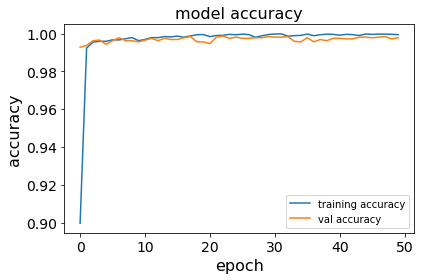

In [14]:
fig, ax = plt.subplots()

ax.plot(history.history['accuracy'],label='training accuracy')
ax.plot(history.history['val_accuracy'],label='val accuracy')

ax.set_title('model accuracy',{'size':16})
ax.set_xlabel('epoch',{'size':16})
ax.set_ylabel('accuracy',{'size':16})
              
plt.tick_params(labelsize=14)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

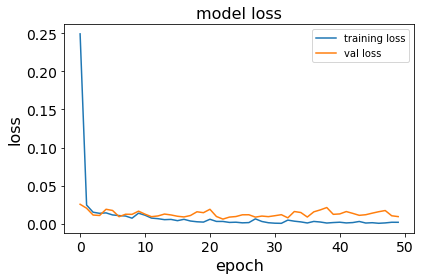

In [15]:
fig, ax = plt.subplots()

ax.plot(history.history['loss'],label='training loss')
ax.plot(history.history['val_loss'],label='val loss')

ax.set_title('model loss',{'size':16})
ax.set_xlabel('epoch',{'size':16})
ax.set_ylabel('loss',{'size':16})
              
plt.tick_params(labelsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### METRICS

confusion_matrix
 [[3949   12]
 [  16 4023]]
accuracy:0.9965
precision:0.9970260223048327
recall:0.9960386234216391
f1-score:0.9965320782759475


Text(33.0, 0.5, 'True')

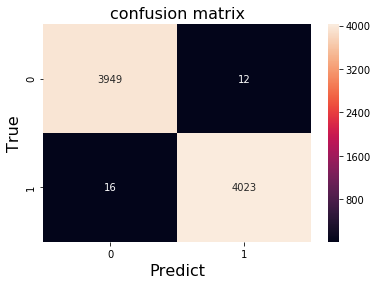

In [16]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score

y_score = model.predict_classes(x_test)
y_score_1 = model.predict(x_test)

import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_test, y_score)
print('confusion_matrix\n', cm)

print('accuracy:{}'.format(accuracy_score(y_test, y_score)))
print('precision:{}'.format(precision_score(y_test, y_score)))
print('recall:{}'.format(recall_score(y_test, y_score)))
print('f1-score:{}'.format(f1_score(y_test, y_score)))

f,ax=plt.subplots()
sns.heatmap(cm,annot=True,ax=ax,fmt='.4g') 

ax.set_title('confusion matrix',fontsize=16) 
ax.set_xlabel('Predict',fontsize=16) 
ax.set_ylabel('True',fontsize=16) 

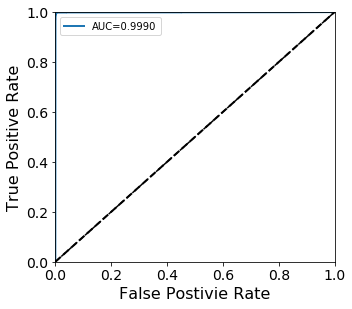

In [17]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 4.4))

auc = roc_auc_score(y_test,y_score_1)

fpr, tpr, thresholds = roc_curve(y_test,y_score_1)   
ax.plot(fpr, tpr, linewidth = 2,label='AUC=%.4f' % auc)
ax.plot([0,1],[0,1], 'k--')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('False Postivie Rate',{'size':16})
ax.set_ylabel('True Positive Rate',{'size':16})

ax.plot([0,1],[0,1], 'k--',lw=2)

plt.tick_params(labelsize=14)

plt.legend()
plt.tight_layout()
plt.show()

In [18]:
y_score_1

array([[1.0000000e+00],
       [1.8286705e-04],
       [2.5331974e-06],
       ...,
       [5.0663948e-07],
       [3.5762787e-07],
       [1.0000000e+00]], dtype=float32)

In [19]:
model.save('crack.h5')